In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the datasets
cleaned_df = pd.read_csv('Cleaned_LA_Dataset.csv', parse_dates=['DATE OCC'], dayfirst=True)
historical_df = pd.read_csv('Crime_Data_from_2010_to_2019.csv', parse_dates=['DATE OCC'], dayfirst=True)

# Identify common columns
common_columns = cleaned_df.columns.intersection(historical_df.columns)

# Select only common columns
cleaned_common = cleaned_df[common_columns]
historical_common = historical_df[common_columns]

# Combine the datasets
combined_df = pd.concat([historical_common, cleaned_common], ignore_index=True)

# **Correct Filtering: Keep only dates up to 2023**
combined_df = combined_df[combined_df['DATE OCC'].dt.year <= 2023]

# Set 'DATE OCC' as the index
combined_df.set_index('DATE OCC', inplace=True)

# Sort by date
combined_df.sort_index(inplace=True)

# Display the combined dataset
print("Combined Dataset:")
print(combined_df.head(5))
print(combined_df.tail(5))

c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\priya\AppData\Local\Temp\ipykernel_83148\2795965299.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_df = pd.read_csv('Crime_Data_from_2010_to_2019.csv', parse_dates=['DATE OCC'], dayfirst=True)


Combined Dataset:
                         Date Rptd  TIME OCC   AREA NAME  Rpt Dist No  \
DATE OCC                                                                
2010-01-01  09/29/2014 12:00:00 AM      1200    Van Nuys          943   
2010-01-01  03/14/2011 12:00:00 AM       700  Hollenbeck          451   
2010-01-01  02/09/2015 12:00:00 AM       900     Central          164   
2010-01-01  02/12/2015 12:00:00 AM      1200     Central          101   
2010-01-01  03/23/2015 12:00:00 AM      1200     Central          147   

            Part 1-2  Crm Cd        Crm Cd Desc  Vict Age Vict Sex  \
DATE OCC                                                             
2010-01-01         2     354  THEFT OF IDENTITY        52        F   
2010-01-01         2     354  THEFT OF IDENTITY        43        M   
2010-01-01         2     354  THEFT OF IDENTITY        48        M   
2010-01-01         2     354  THEFT OF IDENTITY        68        M   
2010-01-01         2     354  THEFT OF IDENTITY   

In [2]:
# Print the columns of the data
data = combined_df.copy()
print(data.columns)

Index(['Date Rptd', 'TIME OCC', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Crm Cd Desc', 'Vict Age', 'Vict Sex', 'Vict Descent',
       'Premis Cd', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Status',
       'Status Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LAT', 'LON'],
      dtype='object')


In [3]:
#Print the some instances of data fot DATE OCC column
print(data.index)

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31', '2023-12-31', '2023-12-31',
               '2023-12-31', '2023-12-31'],
              dtype='datetime64[ns]', name='DATE OCC', length=2987919, freq=None)


In [4]:
print(data.tail())

                      Date Rptd  TIME OCC  AREA NAME  Rpt Dist No  Part 1-2  \
DATE OCC                                                                      
2023-12-31  31-12-2023 00:00:00       330  Southeast         1842         1   
2023-12-31  31-12-2023 00:00:00      1445     Harbor          565         1   
2023-12-31  01-01-2024 00:00:00      1500  Hollywood          643         1   
2023-12-31  31-12-2023 00:00:00       223   Foothill         1668         1   
2023-12-31  31-12-2023 00:00:00       100  Southeast         1802         1   

            Crm Cd                                      Crm Cd Desc  Vict Age  \
DATE OCC                                                                        
2023-12-31     330                            BURGLARY FROM VEHICLE        33   
2023-12-31     320                              BURGLARY, ATTEMPTED        40   
2023-12-31     420  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0   
2023-12-31     310                       

In [5]:
# # Aggregate crime counts per week
# weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')

# # Rename columns for consistency
# weekly_crime.rename(columns={'DATE OCC': 'Date', 'Crime_Count': 'Number_of_Crimes'}, inplace=True)

# # Plot the time series
# plt.figure(figsize=(15, 7))
# plt.plot(weekly_crime['Date'], weekly_crime['Number_of_Crimes'], marker='o', linestyle='-')
# plt.title('Weekly Crime Trend in Los Angeles (2020-2023)')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.grid(True)
# plt.ylim(bottom=0)  # Ensure y-axis starts at zero
# plt.tight_layout()
# plt.show()

In [6]:
# # Aggregate crime counts per week
# weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')

# # Rename columns for consistency
# weekly_crime.rename(columns={'DATE OCC': 'Date', 'Crime_Count': 'Number_of_Crimes'}, inplace=True)

# # Plot the time series
# plt.figure(figsize=(15, 7))
# plt.scatter(weekly_crime['Date'], weekly_crime['Number_of_Crimes'], marker='o', linestyle='-')
# plt.title('Weekly Crime Trend in Los Angeles (2020-2023)')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.grid(True)
# plt.ylim(bottom=0)  # Ensure y-axis starts at zero
# plt.tight_layout()
# plt.show()

In [7]:
# Remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

05:42:23 - cmdstanpy - INFO - Chain [1] start processing
05:42:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


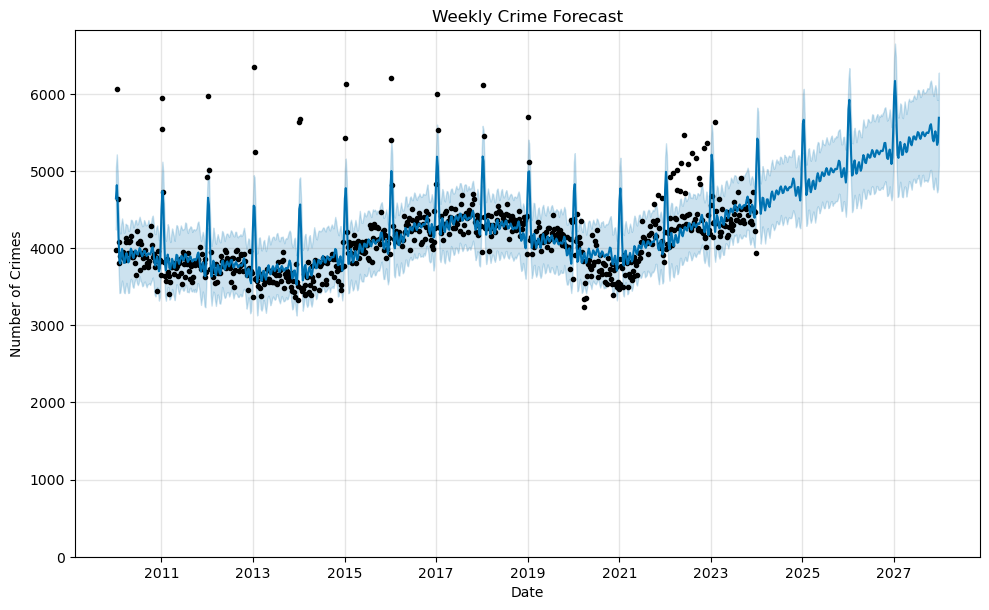

In [8]:
# Weekly Forecast
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')
weekly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the model
model_weekly = Prophet()

model_weekly.fit(weekly_crime)

# Create future dataframe for 4 years (208 weeks)
future_weekly = model_weekly.make_future_dataframe(periods=208, freq='W')

# Forecast future crime trends
forecast_weekly = model_weekly.predict(future_weekly)

# Set negative forecasts to zero
forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# Plot the forecast with adjusted y-axis
fig = model_weekly.plot(forecast_weekly)
plt.title('Weekly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()

05:42:24 - cmdstanpy - INFO - Chain [1] start processing
05:42:24 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\priya\anaconda3\envs\DV\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


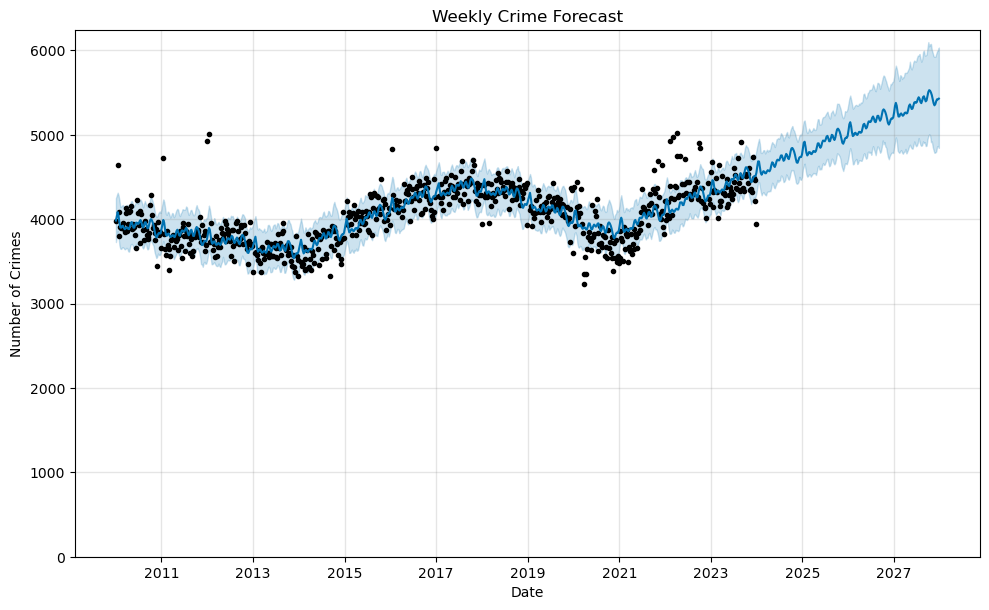

In [9]:
# Aggregate crime counts per week
weekly_crime = data.resample('W').size().reset_index(name='Crime_Count')

# Remove outliers
weekly_crime = remove_outliers(weekly_crime, 'Crime_Count')

# Rename columns for Prophet
weekly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# Initialize and fit the Prophet model
#Use Arnn model or Arima model for better prediction
model_weekly = Prophet()
model_weekly.fit(weekly_crime)

# Create future dataframe for 4 years (208 weeks)
future_weekly = model_weekly.make_future_dataframe(periods=208, freq='W')

# Forecast future crime trends
forecast_weekly = model_weekly.predict(future_weekly)

# Set negative forecasts to zero
forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_weekly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

fig = model_weekly.plot(forecast_weekly)
plt.title('Weekly Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.ylim(bottom=0)
plt.show()

In [10]:
# # Monthly Forecast
# monthly_crime = data.resample('M').size().reset_index(name='Crime_Count')
# monthly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# # Initialize and fit the model
# model_monthly = Prophet()

# model_monthly.fit(monthly_crime)

# # Create future dataframe for 3 years (36 months)
# future_monthly = model_monthly.make_future_dataframe(periods=36, freq='M')

# # Forecast future crime trends
# forecast_monthly = model_monthly.predict(future_monthly)

# # Set negative forecasts to zero
# forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_monthly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# # Plot the forecast with adjusted y-axis
# fig = model_monthly.plot(forecast_monthly)
# plt.title('Monthly Crime Forecast')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.ylim(bottom=0)
# plt.show()

In [11]:
# # Yearly Forecast
# yearly_crime = data.resample('Y').size().reset_index(name='Crime_Count')
# yearly_crime.rename(columns={'DATE OCC': 'ds', 'Crime_Count': 'y'}, inplace=True)

# # Initialize and fit the model
# model_yearly = Prophet()

# model_yearly.fit(yearly_crime)

# # Create future dataframe for 3 years
# future_yearly = model_yearly.make_future_dataframe(periods=3, freq='Y')

# # Forecast future crime trends
# forecast_yearly = model_yearly.predict(future_yearly)

# # Set negative forecasts to zero
# forecast_yearly[['yhat', 'yhat_lower', 'yhat_upper']] = forecast_yearly[['yhat', 'yhat_lower', 'yhat_upper']].clip(lower=0)

# # Plot the forecast with adjusted y-axis
# fig = model_yearly.plot(forecast_yearly)
# plt.title('Yearly Crime Forecast')
# plt.xlabel('Date')
# plt.ylabel('Number of Crimes')
# plt.ylim(bottom=0)
# plt.show()